## Computational complexity (FLOPs) of algorithms, accuracy and energy consumption


(needs citation https://github.com/Phlya/adjustText) 


Pytorch pretrained models used for inference \
Energy consumption is measured using power monitor. \
1000 inferences on same image \
In order to get FLOP - used the pytorch module for profiling https://github.com/Lyken17/pytorch-OpCounter that returns the parameters and the MACs (multiply accumulate operation). \
MAC : a <- a + (b x c)
This module collects all the multiply operations and FLOPs is approximated to be double of MAC to account for other operations like add and divide. https://github.com/Lyken17/pytorch-OpCounter/tree/master/benchmark#macs-flops-what-is-the-difference



In [117]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from scipy import stats
from matplotlib import cm
from adjustText import adjust_text
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [118]:
url = 'logs/models.txt'
df = pd.read_csv(url)

In [119]:
df.describe()

,macs,parameters
count,3.500000e+01,3.500000e+01
mean,6.351510e+09,5.052139e+07
std,6.685961e+09,5.508621e+07
min,4.252426e+07,1.235496e+06
25%,5.659043e+08,5.332784e+06
50%,4.111515e+09,2.383457e+07
75%,1.133300e+10,1.078390e+08
max,2.279560e+10,1.436782e+08


In [127]:
df['FLOPS'] = df['macs'] * 2
df['GFLOPS'] = (df['macs'] * 2) / (10 ** 9) 
df['TFLOPS'] = (df['macs'] * 2) / (10 ** 12)
df['Params(Million)'] = df['parameters'] / (10 ** 6)
df['Log'] = np.log(df['FLOPS'])
df['GFLOPS_log'] = np.log(df['GFLOPS'])
df['Training 1 epoch(pfs-days)'] = df['GFLOPS'] * 2 * 3 * (1.2 * (10 ** 6))

In [128]:
print(df.GFLOPS.count())
df.head()

35


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,GFLOPS_log,Training 1 epoch(pfs-days),FLOPS
0,alexnet,7.146919e+08,61100840.0,1.429384,0.001429,61.100840,21.080509,0.357243,1.029156e+07,1.429384e+09
1,densenet121,2.865672e+09,7978856.0,5.731344,0.005731,7.978856,22.469216,1.745950,4.126568e+07,5.731344e+09
2,densenet161,7.787013e+09,28681000.0,15.574026,0.015574,28.681000,23.468870,2.745605,1.121330e+08,1.557403e+10
3,densenet169,3.398071e+09,14149480.0,6.796142,0.006796,14.149480,22.639621,1.916355,4.893222e+07,6.796142e+09
4,densenet201,4.340971e+09,20013928.0,8.681942,0.008682,20.013928,22.884511,2.161245,6.250998e+07,8.681942e+09


In [126]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['GFLOPS'],marker = "o",color='tab:green')
# plt.plot(df['model'],df['Params(Million)'],marker = "o",color='tab:blue')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [123]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['Training 1 epoch(pfs-days)'],marker = "o",color='tab:green')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [129]:
url = "logs/accuracy.csv" ##top 1 and top 5 error
df_accuracy = pd.read_csv(url)
print(df_accuracy.top1.count())

29


In [130]:
merge_df = df.merge(df_accuracy, on='model')

In [131]:
print(merge_df.top1.count())
merge_df.head()

29


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,GFLOPS_log,Training 1 epoch(pfs-days),FLOPS,top1,top5
0,alexnet,7.146919e+08,61100840.0,1.429384,0.001429,61.100840,21.080509,0.357243,1.029156e+07,1.429384e+09,43.45,20.91
1,densenet121,2.865672e+09,7978856.0,5.731344,0.005731,7.978856,22.469216,1.745950,4.126568e+07,5.731344e+09,25.35,7.83
2,densenet161,7.787013e+09,28681000.0,15.574026,0.015574,28.681000,23.468870,2.745605,1.121330e+08,1.557403e+10,22.35,6.20
3,densenet169,3.398071e+09,14149480.0,6.796142,0.006796,14.149480,22.639621,1.916355,4.893222e+07,6.796142e+09,24.00,7.00
4,densenet201,4.340971e+09,20013928.0,8.681942,0.008682,20.013928,22.884511,2.161245,6.250998e+07,8.681942e+09,22.80,6.43


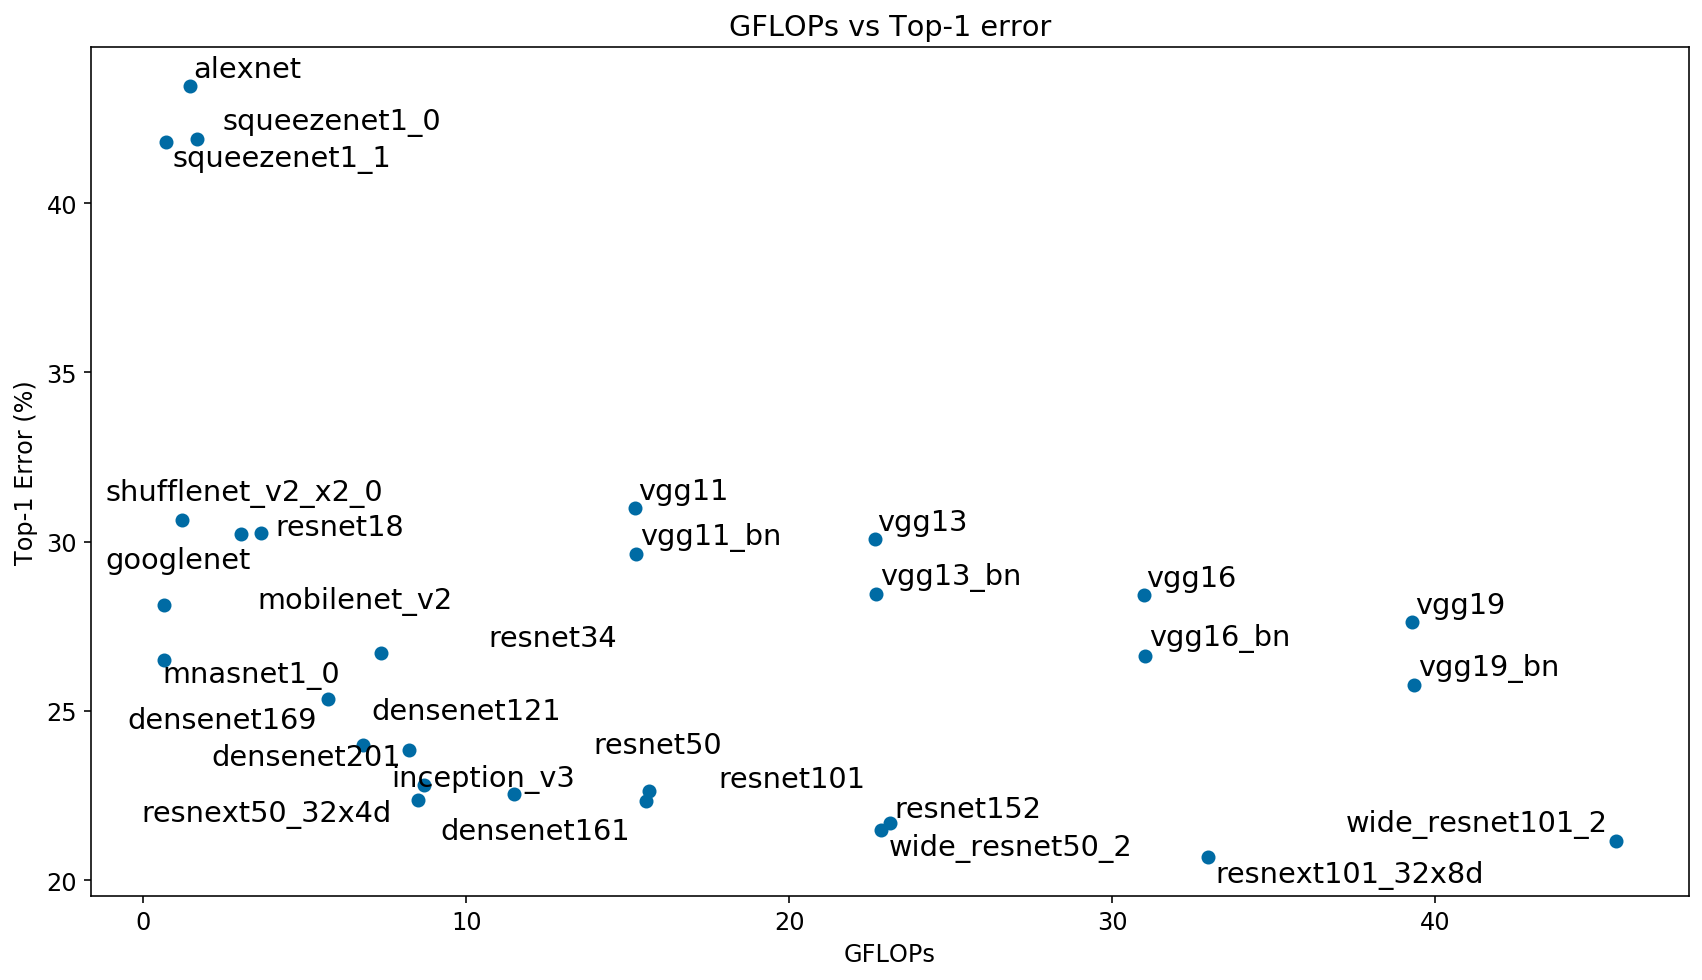

In [140]:
# needs citation https://github.com/Phlya/adjustText
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-1 Error (%)")
ax.set_title("GFLOPs vs Top-1 error")

plt.scatter(merge_df['GFLOPS'], merge_df['top1'])

#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top1'],merge_df['model'])]

adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/top1error.png',dpi=300)

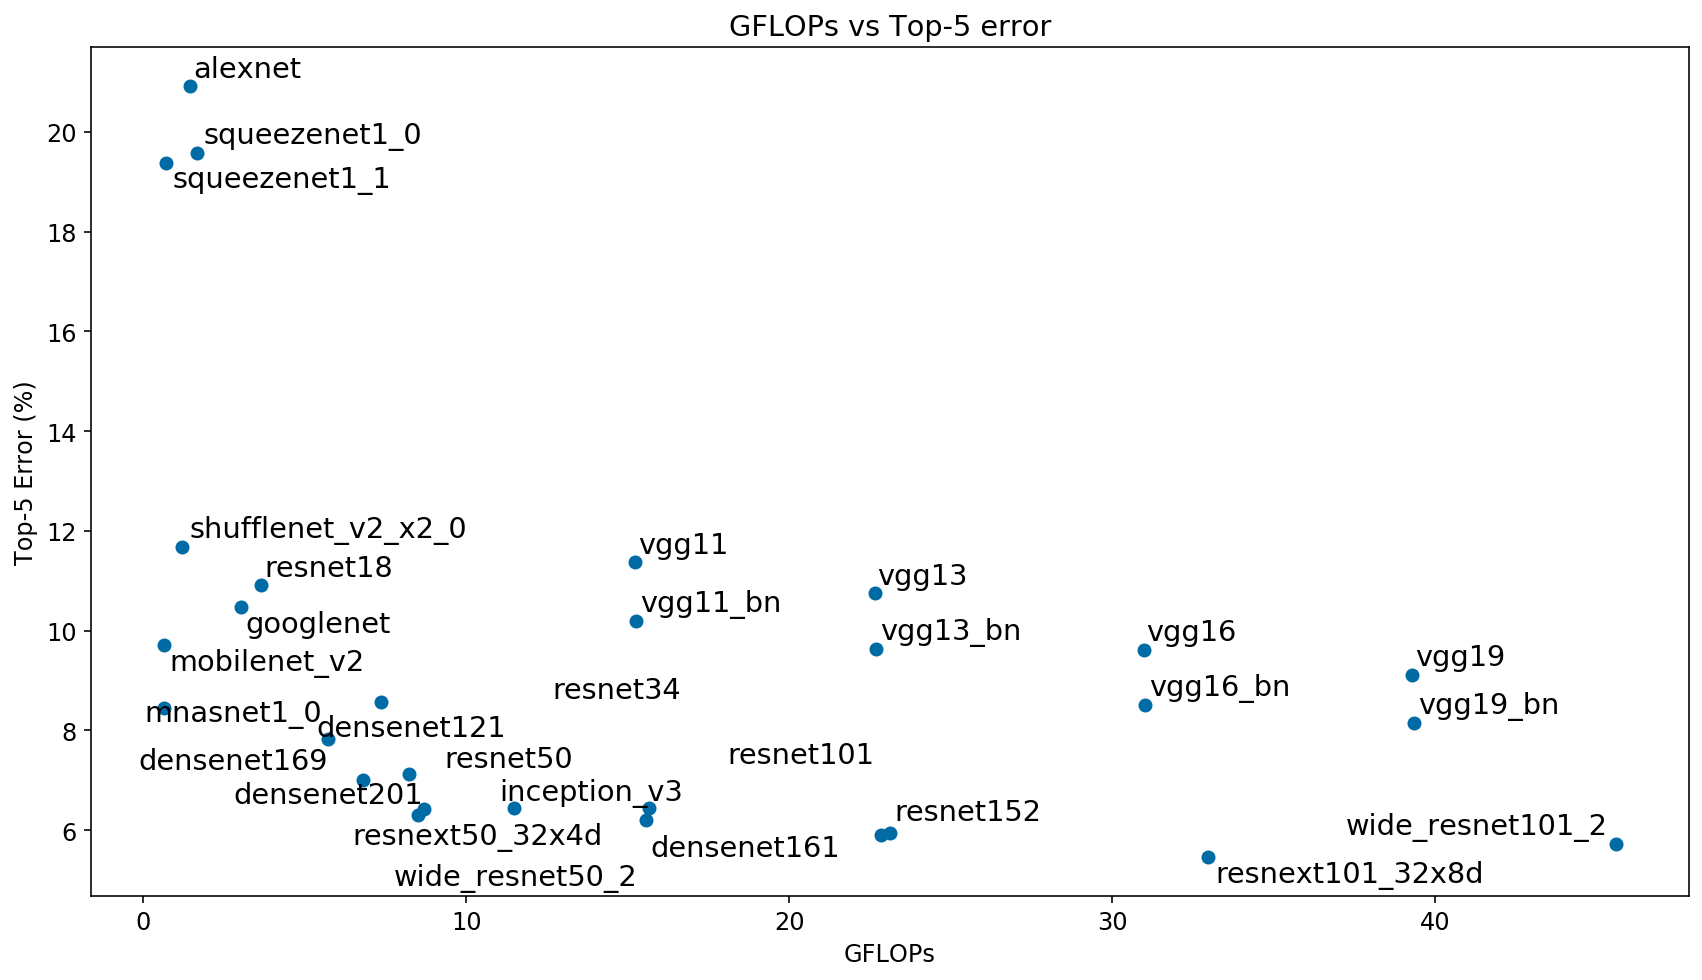

In [145]:
# needs citation https://github.com/Phlya/adjustText
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
ax.set_title("GFLOPs vs Top-5 error")
# cmap = cm.get_cmap('winter')
# c = merge_df['top5']
plt.scatter(merge_df['GFLOPS'], merge_df['top5'])

texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top5'],merge_df['model'])]
# cbar = plt.colorbar()
# cbar.set_label('Top-5 Error (%)')
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/top5error.png',dpi=300)

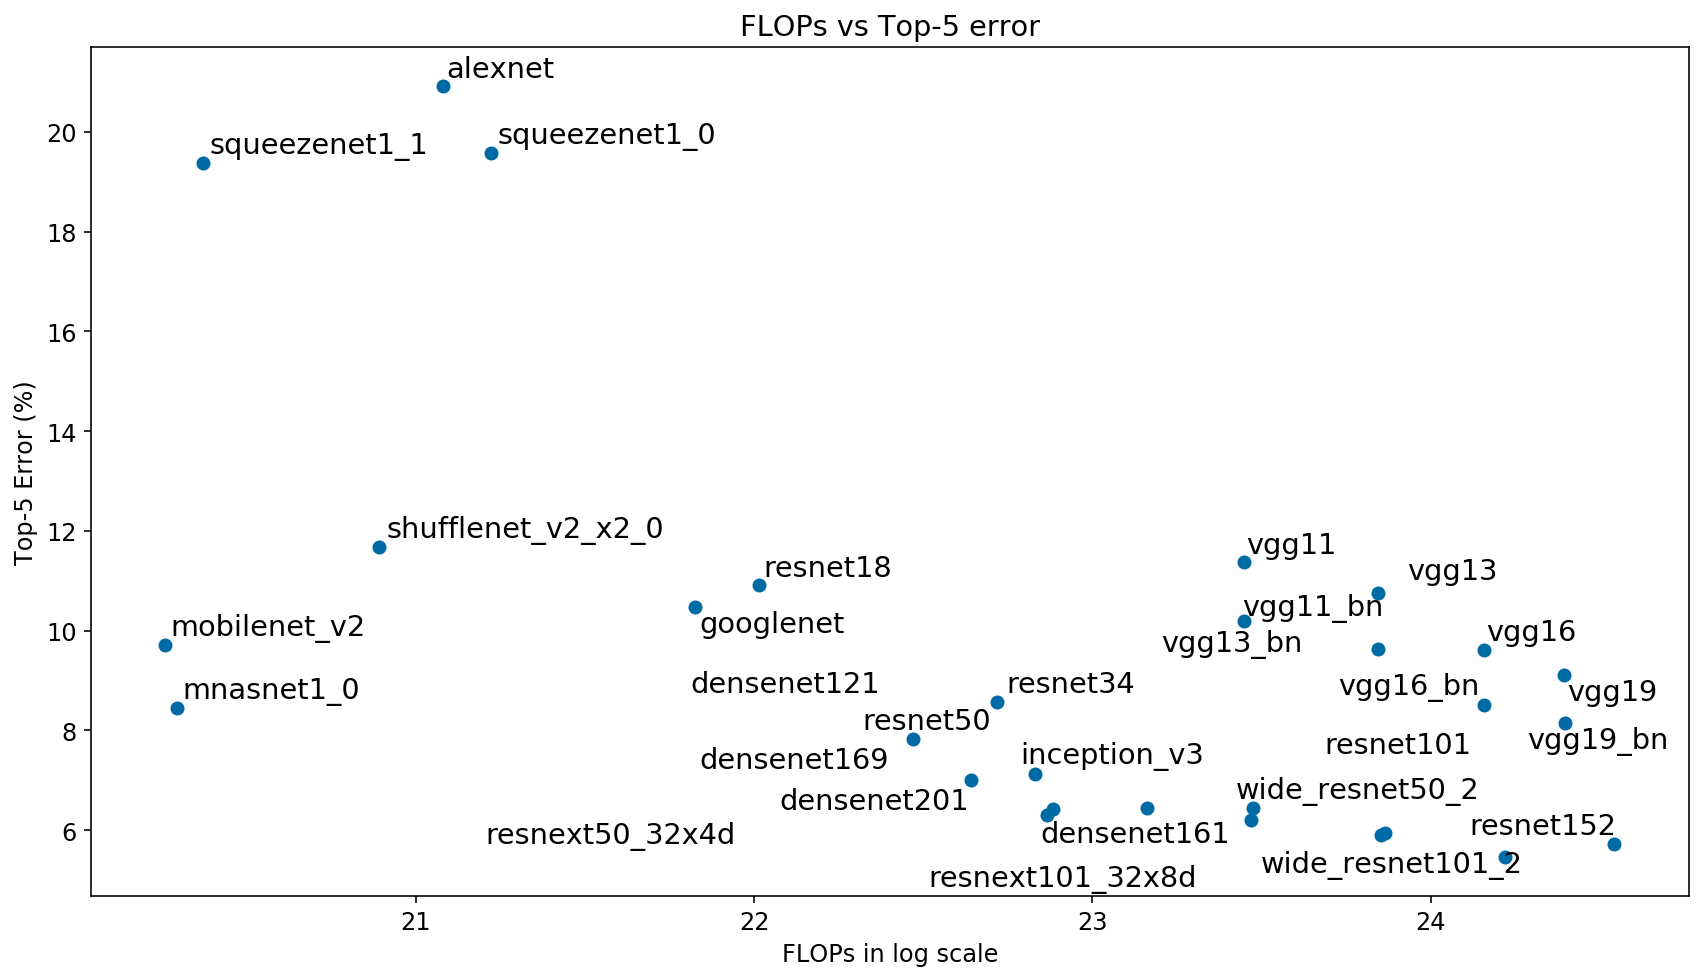

In [144]:
## in log scale
# needs citation https://github.com/Phlya/adjustText
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("FLOPs in log scale")
ax.set_ylabel("Top-5 Error (%)")
ax.set_title("FLOPs vs Top-5 error")
# cmap = cm.get_cmap('winter')
# c = merge_df['top5']
plt.scatter(merge_df['Log'], merge_df['top5'])

texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['Log'],merge_df['top5'],merge_df['model'])]
# cbar = plt.colorbar()
# cbar.set_label('Top-5 Error (%)')
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/logFLOPStop5error.png',dpi=300)

In [42]:
# cmap1= cm.get_cmap('winter')
# ax = merge_df.plot('GFLOPS', 'top5', kind='scatter',
#         c=range(len(merge_df)),colormap=cmap1, figsize=(12,7),
#                   title="GFLOPs vs Top-5 error")
# ax.set_xlabel("GFLOPs")
# ax.set_ylabel("Top-5 Error (%)")
# #merge_df[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row),axis=1);
# texts = [ax.text(x, y, name,size='large') 
#          for x, y, name in zip(merge_df['GFLOPS'],merge_df['top5'],merge_df['model'])]
# adjust_text(texts)
# plt.tight_layout()
# ax.figure.savefig('viz/top5error.png',dpi=300)

In [57]:
x, y = merge_df['GFLOPS'],merge_df['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.13223517898807158 
intercept 11.457116334379469
r_value -0.43211360774286034
p_value 0.019237046397276903
std_err 0.053111265443602104
R squared 0.18672216999655056


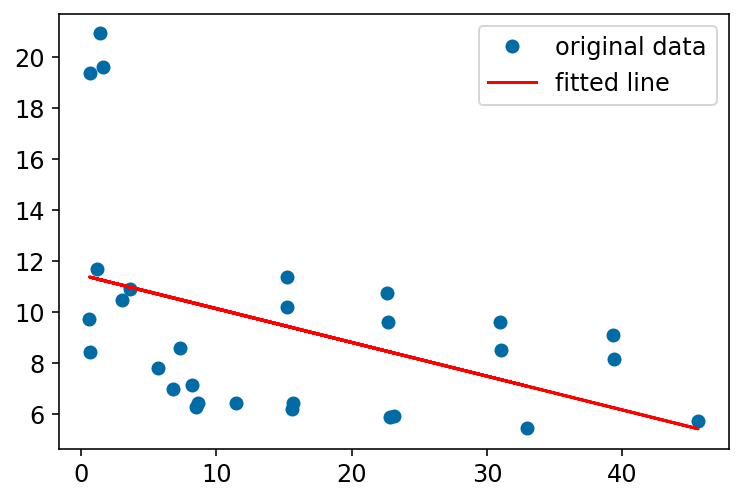

In [58]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

The complexity measured in FLOPs does not necessarily improve the accuracy (or decrease the error).

However, within the same architecture, e.g., VGG and resnet, the error decreases linearly with FLOPs

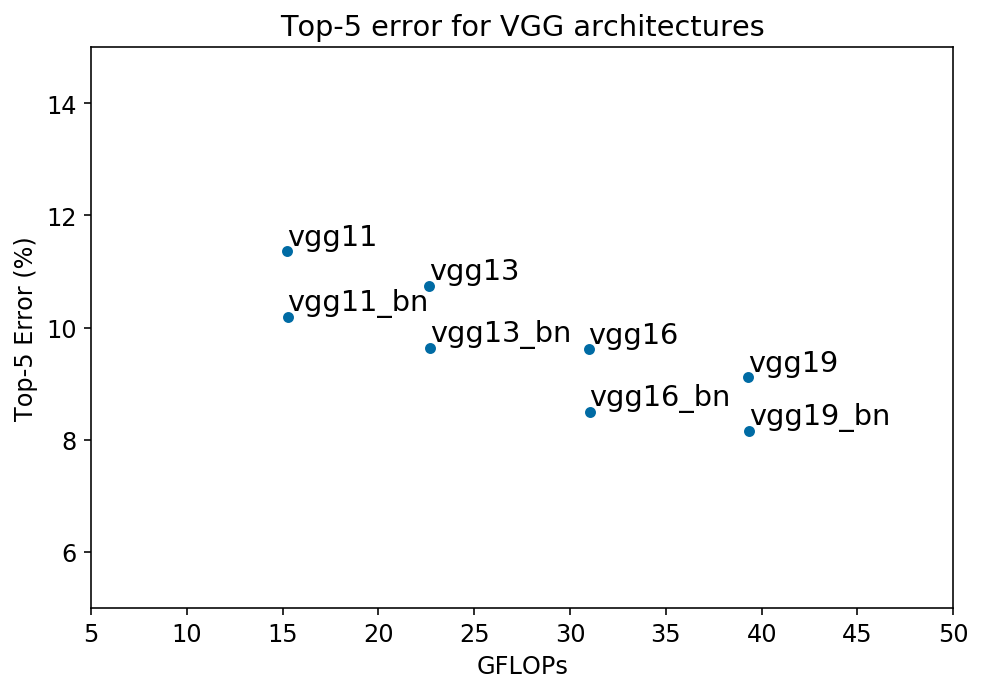

In [59]:
vggset = ['vgg11','vgg13','vgg16','vgg19','vgg11_bn','vgg13_bn','vgg16_bn','vgg19_bn']
vgg = merge_df.loc[merge_df.model.isin(vggset)]
ax = vgg.plot('GFLOPS', 'top5', kind='scatter',
         figsize=(7,5))
ax.set_xlim(5,50)
ax.set_ylim(5,15)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
ax.set_title("Top-5 error for VGG architectures")
vgg[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row,ha='left',va='bottom',size='large'),axis=1);
plt.tight_layout()
ax.figure.savefig("viz/vggtop5error.png",dpi=300)

In [60]:
x, y = vgg['GFLOPS'],vgg['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.0940566389469843 
intercept 12.211244926500065
r_value -0.8313541476640571
p_value 0.010525762985377246
std_err 0.025668575213328274
R squared 0.691149718838231


## power monitor readings

In [61]:
df_reading = pd.read_csv("logs/power_reading_1.csv")

In [62]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [63]:
df_reading.tail()

,entity_id,node_id,power_consumption,unit
last_changed,,,,
2020-05-30 14:32:33.790128+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.784,W
2020-05-30 14:32:36.793057+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.675,W
2020-05-30 14:32:39.782380+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.729,W
2020-05-30 14:32:42.790067+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.778,W
2020-05-30 14:32:45.788001+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.794,W


In [64]:
df_time_interval = pd.read_csv("logs/pm.csv")

In [65]:
print(df_time_interval.model.count())
df_time_interval.head()

30


,model,start_time,end_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626


In [66]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval['total_time'] = df_time_interval['end_seconds'] - df_time_interval['start_seconds']
df_time_interval['total_time'] = df_time_interval['total_time'].apply(lambda x: x.total_seconds())
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779


In [67]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033,2020-06-24,2020-06-24,09:28:27,09:28:55
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194,2020-06-24,2020-06-24,09:28:55,09:29:41
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172,2020-06-24,2020-06-24,09:29:42,09:30:34
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060,2020-06-24,2020-06-24,09:30:35,09:31:29
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779,2020-06-24,2020-06-24,09:31:29,09:32:29


In [68]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()


In [80]:
def energy_consumption(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return ((subset_df['power_consumption']).sum() * 3) #Joules 

In [81]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'empirical'] = energy_consumption(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [82]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'mean_power'] = power_mean(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [83]:
df_time_interval['power'] = df_time_interval['mean_power'] * df_time_interval['total_time']
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time,mean_power,empirical,power
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033,2020-06-24,2020-06-24,09:28:27,09:28:55,180.525600,5415.768,5103.284144
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194,2020-06-24,2020-06-24,09:28:55,09:29:41,177.310733,7978.983,8153.491160
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172,2020-06-24,2020-06-24,09:29:42,09:30:34,211.831000,11438.874,11169.673234
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060,2020-06-24,2020-06-24,09:30:35,09:31:29,180.346000,9738.684,9730.939943
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779,2020-06-24,2020-06-24,09:31:29,09:32:29,187.401750,11244.105,11189.154871


In [84]:
new_df = df_time_interval.merge(merge_df, on='model')
new_df.model.count()

27

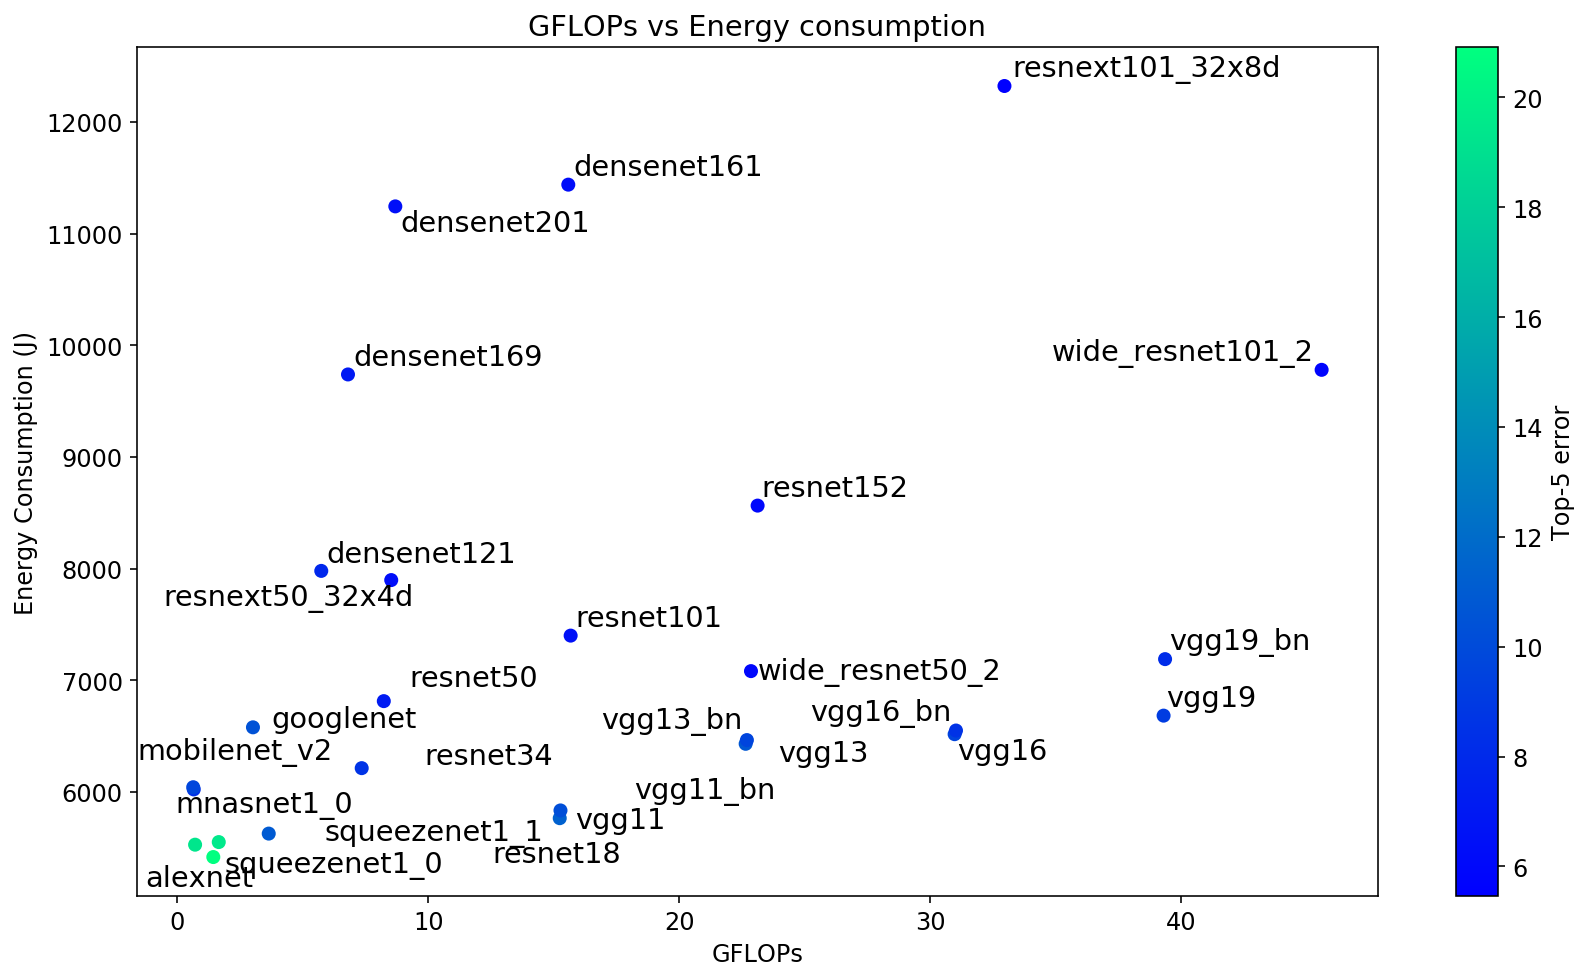

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Energy Consumption (J)")
ax.set_title("GFLOPs vs Energy consumption")
cmap = cm.get_cmap('winter')
c = new_df['top5']
plt.scatter(new_df['GFLOPS'], new_df['empirical'],
        c=c, cmap=cm.get_cmap('winter'))

texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(new_df['GFLOPS'],new_df['empirical'],new_df['model'])]
cbar = plt.colorbar()
cbar.set_label('Top-5 error')
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/inference_gflops_power.png',dpi=300)

In [93]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(new_df['GFLOPS'],new_df['empirical'] )
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)

slope 44.97609149748801 
intercept 6642.602236156222
r_value 0.31431148850038065
p_value 0.11033314890369995
std_err 27.1683986210472
R squared  0.09879171180332492


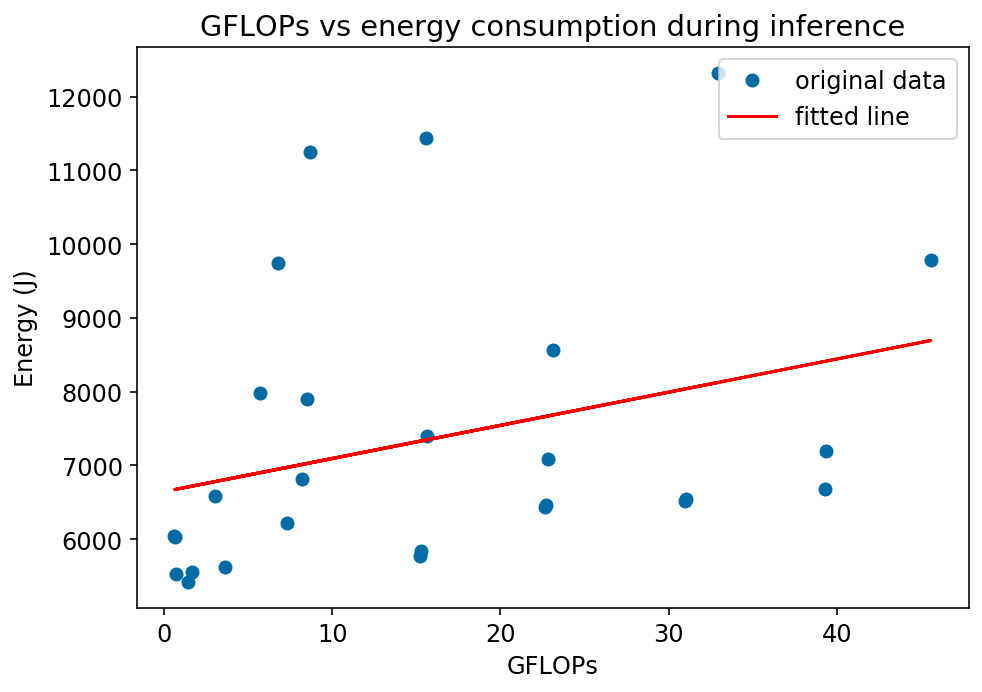

In [94]:
x = new_df['GFLOPS']
y = new_df['empirical']
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Energy (J)")
plt.title("GFLOPs vs energy consumption during inference")
plt.legend()
plt.tight_layout()
plt.savefig('viz/inference_gflops_power_fit.png',dpi=300)

In [95]:
vgg_df = df_time_interval.merge(vgg, on='model')

In [96]:
#ax = vgg_df.plot('GFLOPS', 'power', kind='scatter')
slope, intercept, r_value, p_value, std_err = stats.linregress(vgg_df['GFLOPS'],vgg_df['empirical'] )
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)

slope 43.10826873428321 
intercept 5261.997202675967
r_value 0.9085862021963315
p_value 0.0017812055523538422
std_err 8.09059729688248
R squared  0.8255288868215529


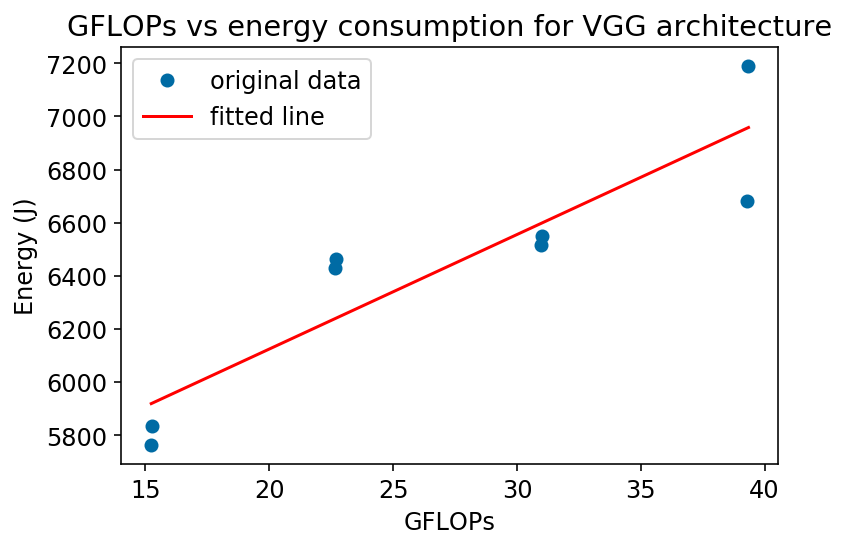

In [99]:
x = vgg_df['GFLOPS']
y = vgg_df['empirical']
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Energy (J)")
plt.title("GFLOPs vs energy consumption for VGG architecture")
plt.legend()
plt.tight_layout()
plt.savefig('viz/vgg_gflops_power_fit.png',dpi=300)

In [100]:
df_co2 = pd.read_csv("../BERT/results/co2data.csv")
uk_co2 = df_co2.loc[df_co2.country == 'United Kingdom'].impact.mean()

df_time_interval['CO2e'] = uk_co2 * df_time_interval['empirical'] / (1000 * 3600)
df_time_interval['kg CO2e/kWh'] = df_time_interval['CO2e'] /1000

In [103]:
features = ['model','power','empirical','kg CO2e/kWh']
df_time_interval[features]

,model,power,empirical,kg CO2e/kWh
0,alexnet,5103.284144,5415.768,0.000937
1,densenet121,8153.491160,7978.983,0.001381
2,densenet161,11169.673234,11438.874,0.001980
3,densenet169,9730.939943,9738.684,0.001685
4,densenet201,11189.154871,11244.105,0.001946
5,googlenet,6476.798429,6577.764,0.001138
6,mnasnet0_5,6054.304472,6024.954,0.001043
7,mnasnet1_0,6067.766303,6021.774,0.001042
8,mobilenet_v2,6115.959804,6041.175,0.001045
9,resnet101,7751.937469,7399.236,0.001280
